In [1]:
# Initialization

## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression


import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create scrollbars for each argument
n_samples_slider = widgets.IntSlider(min=1, max=1000, value=100, description='n_samples:')
noise_slider = widgets.FloatSlider(min=0, max=10, value=1, description='noise:')
bias_slider = widgets.FloatSlider(min=0, max=100, value=100, description='bias:')
effective_rank_slider = widgets.IntSlider(min=0, max=10, value=2, description='effective_rank:')

# Display the scrollbars
display(n_samples_slider, noise_slider, bias_slider, effective_rank_slider)

# Create an output widget to hold the plot
output = widgets.Output()
display(output)

# Function to update the plot based on the widget values
def update_plot(change):
    with output:
        clear_output(wait=True)
        # Get the updated values from the scrollbars
        n_samples = n_samples_slider.value
        noise = noise_slider.value
        bias = bias_slider.value
        effective_rank = effective_rank_slider.value

        # Generate linear dataset with the updated values
        X, y = make_regression(n_samples=n_samples, n_features=1, noise=noise, bias=bias, effective_rank=effective_rank)

        # Plot the updated data
        plt.figure()
        plt.scatter(X, y, color='blue', label='Data')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show()

# Register the callback function to update the plot when the widget values change
n_samples_slider.observe(update_plot, 'value')
noise_slider.observe(update_plot, 'value')
bias_slider.observe(update_plot, 'value')
effective_rank_slider.observe(update_plot, 'value')

# Initial plot
update_plot(None)


IntSlider(value=100, description='n_samples:', max=1000, min=1)

FloatSlider(value=1.0, description='noise:', max=10.0)

FloatSlider(value=100.0, description='bias:')

IntSlider(value=2, description='effective_rank:', max=10)

Output()

### RANSAC Iterations Formula

The number of RANSAC iterations \( T \) can be calculated using the following formula:

\[ 
T = \frac{ \log(1 - p) }{ \log(1 - (1 - e)^s) } 
\]

where:
- \( p \) is the probability of success,
- \( e \) is the outlier ratio,
- \( s \) is the number of samples.


In [65]:

# Function to calculate the number of RANSAC iterations using the given formula
def calculate_ransac_iterations(prob_success, outlier_ratio, num_samples):
    return np.ceil(np.log(1 - prob_success) / np.log(1 - (1 - outlier_ratio)**num_samples)).astype(int)

# Define the range of probability of success and sample sizes
probability_of_success = np.array([0.1, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999])
sample_sizes = np.array([2, 3, 4, 5, 10, 15, 20])  # Specific sample sizes

# Create a FloatSlider widget for outlier ratio
outliers_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.3, description='Outlier Ratio:')

# Function to update the DataFrame based on the outlier ratio
def update_df(outlier_ratio):
    # Calculate the RANSAC iterations for each combination of probability of success and sample size
    iterations = np.zeros((len(probability_of_success), len(sample_sizes)))

    for i, p in enumerate(probability_of_success):
        for j, s in enumerate(sample_sizes):
            iterations[i, j] = calculate_ransac_iterations(p, outlier_ratio, s)

    # Create a DataFrame for better visualization
    iterations_df = pd.DataFrame(
        iterations,
        index=[f'{(1-p)*100:.1f}%' for p in probability_of_success],
        columns=[f'{s}' for s in sample_sizes]
    )

    iterations_df.index.name = 'Proportion of Inliers'
    iterations_df.columns.name = 'Number of Samples'
    
    display(iterations_df)

# Display the FloatSlider widget and update the DataFrame based on its value
widgets.interactive(update_df, outlier_ratio=outliers_slider)


interactive(children=(FloatSlider(value=0.3, description='Outlier Ratio:', max=1.0, step=0.01), Output()), _do…

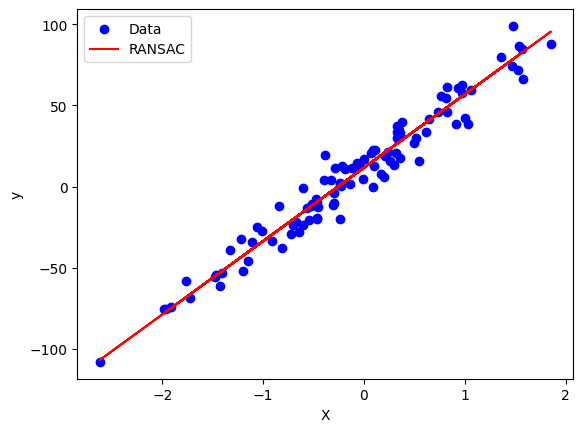

In [27]:
# Generate linear dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, bias=10, random_state=42)

# Fit RANSACRegressor model
ransac = RANSACRegressor()
ransac.fit(X, y)

# Plot the data and the RANSACRegressor model
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, ransac.predict(X), color='red', label='RANSAC')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
